In [66]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.circuit import Gate
from qiskit_textbook.tools import array_to_latex
from math import pi,sqrt
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit_textbook.widgets import plot_bloch_vector_spherical
from qiskit.quantum_info import Operator
from random import choices


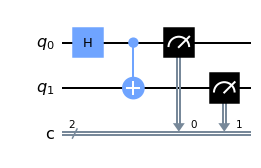

In [67]:
################### Part 1 - Bell State ###################
def getQCPart1():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    qc.measure([0,1],[0,1])
    return qc

#Draw Circuit
qCircuit = getQCPart1()
qCircuit.draw()


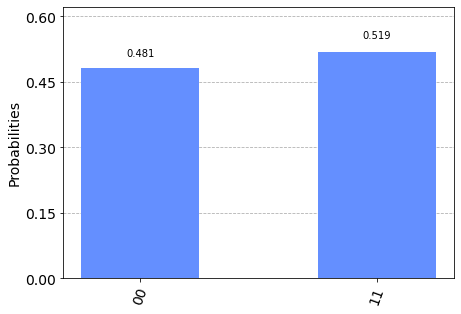

In [68]:
#print histogram
backend_qasm = Aer.get_backend('qasm_simulator')
counts = execute(qCircuit ,backend_qasm, shots=1000).result().get_counts()
plot_histogram(counts)

In [69]:
#################### Part 2 - Error Gate ###################
#Function Error Gate returns I with probability 0.8, X with probability 0.1 and Y with Probability 0.1

#Global Var to print gate selected and specify probabilities
printGateSelected = False
iProb=0.7
xProb=0.15
zProb=0.15
    
def errorGate():
    cx_op = Operator([[1,0], [0,1]]) #Initialize to I
    population = ['I', 'X', 'Z']
    weights = [iProb, xProb, zProb]
    choiceGate = choices(population, weights)
    if printGateSelected:
        print('Error Gate Selected is ', choiceGate)
    if choiceGate[0] == 'X':
        cx_op = Operator([[0, 1], [1, 0]]) #X Gate
    elif choiceGate[0] == 'Z':
        cx_op = Operator([[1, 0], [0, -1]]) #Z Gate
    return cx_op

def changeProbToFavorZ():
    iProb=0.5
    xProb=0.1
    zProb=0.4

def resetProb():
    iProb=0.7
    xProb=0.15
    zProb=0.15

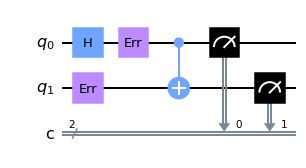

In [70]:
#Part 2 - Circuit with error gate
def getQCPart2():
    qc_2 = QuantumCircuit(2,2)
    qc_2.h(0)
    qc_2.unitary(errorGate(), [0], label='err')
    qc_2.unitary(errorGate(), [1], label='err')
    qc_2.cx(0,1)
    qc_2.measure([0,1], [0,1])
    return qc_2

qCircuit = getQCPart2()
qCircuit.draw()

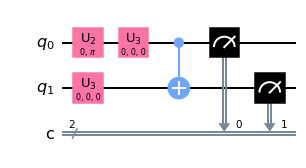

In [71]:
#Draw decomposed state a few times to ensure it draws different outputs. You may have to run this a few times to see it.
qCircuit = getQCPart2()
qCircuit.decompose().draw()

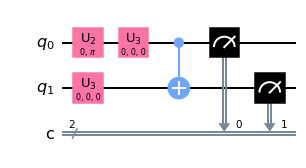

In [72]:
#Draw decomposed state a few times to ensure it draws different outputs. You may have to run this a few times to see it.
qCircuit = getQCPart2()
qCircuit.decompose().draw()

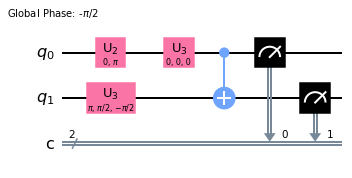

In [73]:
#Draw decomposed state a few times to ensure it draws different outputs. You may have to run this a few times to see it.
qCircuit = getQCPart2()
qCircuit.decompose().draw()

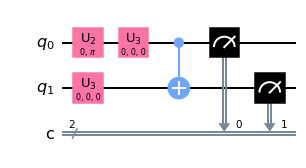

In [74]:
#Draw decomposed state a few times to ensure it draws different outputs. You may have to run this a few times to see it.
qCircuit = getQCPart2()
qCircuit.decompose().draw()

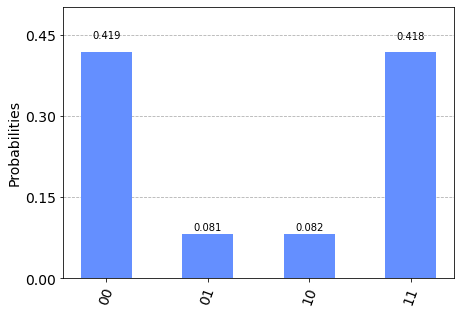

In [75]:
#Run many times and show output in histogram
def runManyAndCombineResult(circuitFun, numRuns):
    backend = Aer.get_backend('qasm_simulator')
    combinedResultFromAllRuns = {}
    for x in range(numRuns):
        qc_e = circuitFun()
        #qc_e.measure_all()
        counts = execute(qc_e,backend).result().get_counts()
        for k in counts.keys():
            if k in combinedResultFromAllRuns.keys():
                combinedResultFromAllRuns[k] = combinedResultFromAllRuns[k] + counts.get(k)
            else:
                combinedResultFromAllRuns[k] = counts.get(k)
    return combinedResultFromAllRuns

#As you increase the probability of error gate having X and Z the chances of 01, 10 increase. 
#With defaults we see probability of 01 or 10 ~15% which is inline with defaults we have selected.
#This may take some time for 1000 runs
#Note - We will compare result here with that in part 4
plot_histogram(runManyAndCombineResult(getQCPart2, 1000))


In [76]:
#################### Part 3a - Implement and Incorporate Bit Flip and Sign Flip ###################
#We are going to use bit flip for qubit 1(that is initialized to 0) and sign flip for qubit 0(that has h gate applied to)
#in part 3b we analyze the impact of error gate on the individual qubits and how the bit or sign flip gates can reduce error
def putBitFlipAroundGate(gateFunc, gateLabel):
    qc1 = QuantumCircuit(3)
    qc1.cx(0,1)
    qc1.cx(0,2)
    qc1.unitary(gateFunc(), [0], label=gateLabel)
    qc1.unitary(gateFunc(), [1], label=gateLabel)
    qc1.unitary(gateFunc(), [2], label=gateLabel)
    qc1.cx(0,1)
    qc1.cx(0,2)
    qc1.ccx(1,2,0)
    gt = qc1.to_gate(None,"BitFlip Ar " + gateLabel)
    return gt

def putSignFlipAroundGate(gateFunc, gateLabel):
    qc1 = QuantumCircuit(3)
    qc1.cx(0,1)
    qc1.cx(0,2)
    qc1.h(0)
    qc1.h(1)
    qc1.h(2)
    qc1.unitary(gateFunc(), [0], label=gateLabel)
    qc1.unitary(gateFunc(), [1], label=gateLabel)
    qc1.unitary(gateFunc(), [2], label=gateLabel)
    qc1.h(0)
    qc1.h(1)
    qc1.h(2)
    qc1.cx(0,1)
    qc1.cx(0,2)
    qc1.ccx(1,2,0)
    gt = qc1.to_gate(None,"SignFlip Ar " + gateLabel)
    return gt



In [77]:
#This is the final circuit
def getFullCircuit():
    qc = QuantumCircuit(6,2)
    qc.h(0)
    qc.append(putSignFlipAroundGate(errorGate, 'ErrG'), [0,1,2])
    qc.append(putBitFlipAroundGate(errorGate, 'ErrG'), [3,4,5])
    qc.cx(0,3)
    qc.measure([0,3],[0,1])
    return qc

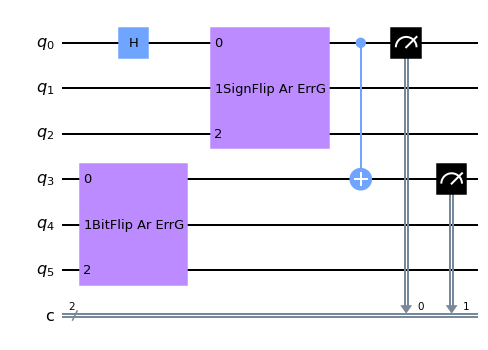

In [78]:
qCircuit = getFullCircuit()
qCircuit.draw()

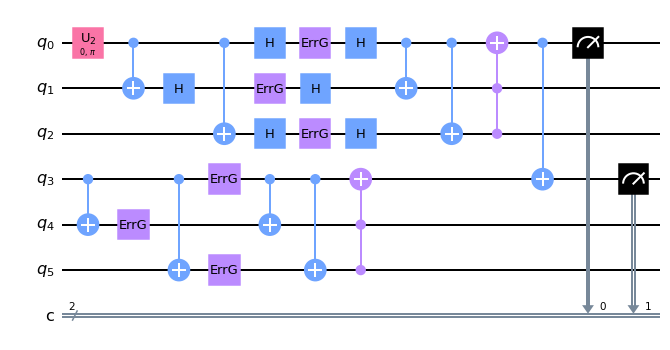

In [79]:
#See details
qCircuit = getFullCircuit()
qCircuit.decompose().draw()

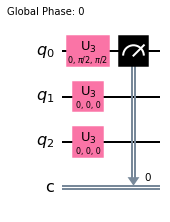

In [80]:
#################### Part 3a - Testing our bit flip and sign flips ###################
#We first analyze the impact of error gate on qubit 1, which is initialized to 0
def errorGateOnQubitInit0():
    qCircuit = QuantumCircuit(3,1)
    qCircuit.unitary(errorGate(), [0], label='err')
    qCircuit.unitary(errorGate(), [1], label='err')
    qCircuit.unitary(errorGate(), [2], label='err')
    qCircuit.measure([0], [0])
    return qCircuit

qCircuit = errorGateOnQubitInit0()
qCircuit.decompose().draw()

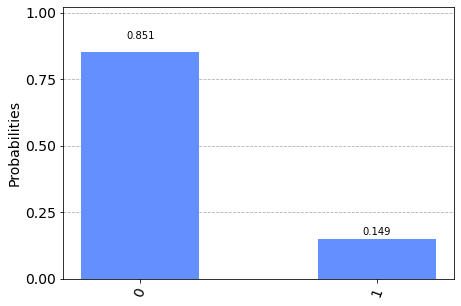

In [81]:
#When running a 1000 times, we see error ~15% which is what we expect as probability of X gate is 15%. I and Z gate do not impact outcome
plot_histogram(runManyAndCombineResult(errorGateOnQubitInit0, 1000))

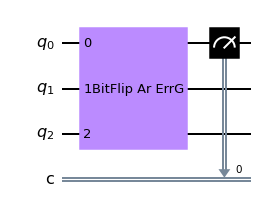

In [82]:
def BitFlip_Ar_errorGateOnQubitInit0():
    qCircuit = QuantumCircuit(3,1)
    qCircuit.append(putBitFlipAroundGate(errorGate, 'ErrG'), [0,1,2])
    qCircuit.measure([0], [0])
    return qCircuit

qCircuit = BitFlip_Ar_errorGateOnQubitInit0()
qCircuit.draw()

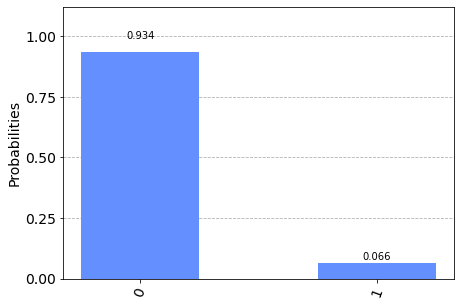

In [83]:
#Error reduces when using bit flip. however, it cannot be 0% as there is always possibility of more than one qubit flipping
plot_histogram(runManyAndCombineResult(BitFlip_Ar_errorGateOnQubitInit0, 1000))

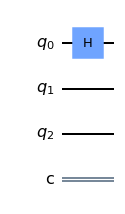

In [84]:
#Now we analyze and impact on qubit 0
#Error gate on a qubit initialized to H
def QuibitInitH():
    qCircuit = QuantumCircuit(3,1)
    qCircuit.h(0)
    return qCircuit

qCircuit = QuibitInitH()
qCircuit.draw()

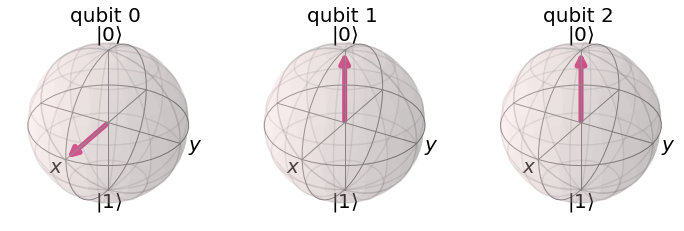

In [85]:
#Impact of the Z gate is only on phase of qubit 0. I and X gate have no impact
#We use a bloch sphere to analyze the impact
backend = Aer.get_backend('statevector_simulator')
out = execute(qCircuit,backend).result().get_statevector()
plot_bloch_multivector(out)

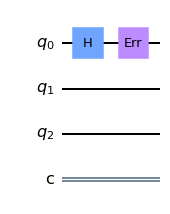

In [86]:
#Now we analyze impact of error gate on qubit 0
def errorGateOnQubitInitH():
    qCircuit = QuantumCircuit(3,1)
    qCircuit.h(0)
    qCircuit.unitary(errorGate(), [0], label='err')
    return qCircuit

qCircuit = errorGateOnQubitInitH()
qCircuit.draw()

Error Gate Selected is  ['Z']


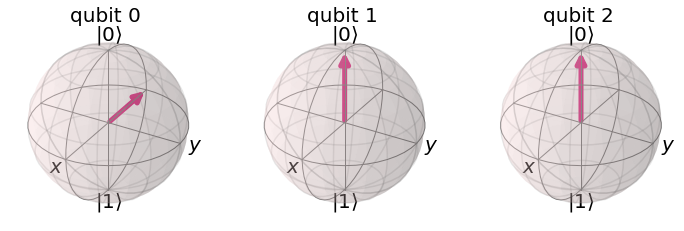

In [97]:
#When I and X gate are applied there is no change. However, when a Z gate is applied the phase changes
#Please run below a few times to see Z gate applied. For this part of the exercise we increase probability of Z gate to see this sooner.
printGateSelected=True
changeProbToFavorZ()
qCircuit = errorGateOnQubitInitH()
resetProb()
printGateSelected=False
backend = Aer.get_backend('statevector_simulator')
out = execute(qCircuit,backend).result().get_statevector()
plot_bloch_multivector(out)


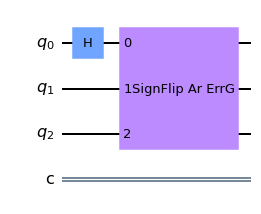

In [88]:
#Now we add sign flip around the error gate for qubit 0
def SignFlip_Ar_errorGateOnQubitInitH():
    qCircuit = QuantumCircuit(3,1)
    qCircuit.h(0)
    qCircuit.append(putSignFlipAroundGate(errorGate, 'ErrG'), [0,1,2])
    return qCircuit

qCircuit = SignFlip_Ar_errorGateOnQubitInitH()
qCircuit.draw()

Error Gate Selected is  ['Z']
Error Gate Selected is  ['I']
Error Gate Selected is  ['I']


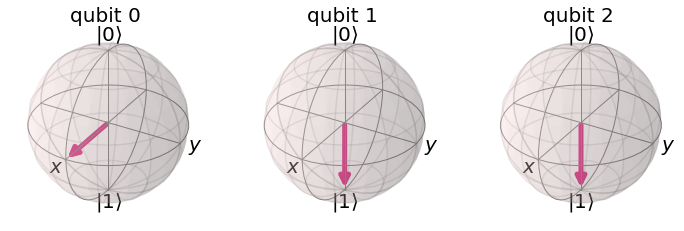

In [98]:
#Run below a few times till Z gate is selected for first qubit and as can be seen the phase does not change most of the time.
printGateSelected=True
changeProbToFavorZ()
qCircuit = SignFlip_Ar_errorGateOnQubitInitH()
resetProb()
printGateSelected=False
backend = Aer.get_backend('statevector_simulator')
out = execute(qCircuit,backend).result().get_statevector()
plot_bloch_multivector(out)

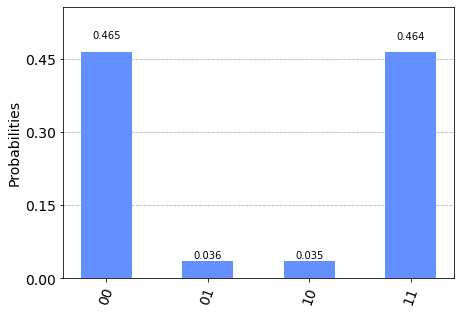

In [99]:
#################### Part 4 - Test and Compare result ###################
#We compare the result here with that in part 2 and 
# see there is substantial reduction in error. probability of 01 and 10 is reduced substantially from ~15% to ~6%
#This may take some time for 1000 runs
plot_histogram(runManyAndCombineResult(getFullCircuit, 1000))